In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

In [2]:
df = pd.read_csv("outputmesswerteo43.csv", delimiter=";", decimal= ",")
df

,Grad,stromstärke_grün_ohne,stromstärke_grün_mit,stromstärke_rot_ohne,stromstärke_rot_mit
0,0,94.39,61.95,92.31,73.41
1,10,94.85,57.13,92.66,69.91
2,20,91.25,50.10,90.40,62.68
3,30,83.42,38.93,82.06,51.80
4,40,71.10,27.27,74.23,40.87
5,50,63.32,15.33,57.99,27.74
6,60,37.71,6.95,41.40,14.48
7,70,21.61,1.62,23.93,5.83
8,80,10.56,0.22,9.14,1.19
9,90,1.58,2.31,1.67,0.59


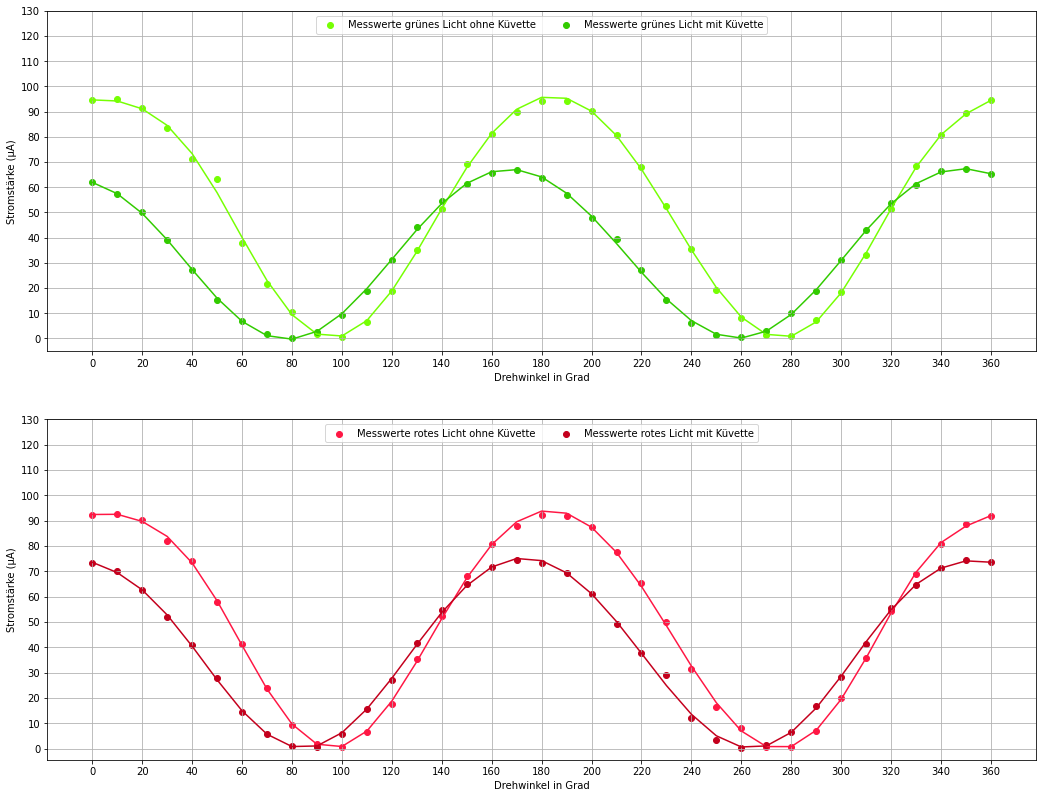

In [3]:
cm = 1/2.54

fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(45*cm, 35*cm))

x1 = df['Grad']
x2 = df['Grad']
gy1 = df['stromstärke_grün_ohne']
gy2 = df['stromstärke_grün_mit']
ry1 = df['stromstärke_rot_ohne']
ry2 = df['stromstärke_rot_mit']

yhat = savgol_filter(gy1, 35, 11) # window size 51, polynomial order 3
yhat2 = savgol_filter(gy2, 35, 11) # window size 51, polynomial order 3


yhat3 = savgol_filter(ry1, 35, 11) # window size 51, polynomial order 3
yhat4 = savgol_filter(ry2, 35, 11) # window size 51, polynomial order 3

#X1_Y1_Spline = make_interp_spline(x1, gy1)

#X1_ = np.linspace(x1.min(), x1.max(), 100)
#Y1_ = X1_Y1_Spline(X1_)

ax1.scatter(x1, gy1, color= '#76ff03', label = 'Messwerte grünes Licht ohne Küvette')
ax1.scatter(x1, gy2, color='#32cb00', label = 'Messwerte grünes Licht mit Küvette')
ax2.scatter(x2, ry1, color= '#ff1744', label = 'Messwerte rotes Licht ohne Küvette')
ax2.scatter(x2, ry2, color='#c4001d', label = 'Messwerte rotes Licht mit Küvette')


ax1.plot(x1,yhat, color='#76ff03')
ax1.plot(x1,yhat2, color='#32cb00')


ax2.plot(x1,yhat3, color='#ff1744')
ax2.plot(x1,yhat4, color='#c4001d')

ax1.set(xlabel='Drehwinkel in Grad', ylabel='Stromstärke (µA)')
ax1.grid()
ax1.set_xticks(np.arange(0, 380, 20))
ax1.set_yticks(np.arange(0, 140, 10))
ax1.legend(loc='upper center',fancybox=True, ncol=5)


ax2.set(xlabel='Drehwinkel in Grad', ylabel='Stromstärke (µA)')
ax2.grid()
ax2.set_xticks(np.arange(0, 380, 20))
ax2.set_yticks(np.arange(0, 140, 10))
ax2.legend(loc='upper center',fancybox=True, ncol=5)
plt.rcParams.update({'font.size': 18})
#plt.savefig('plot-angle2.png')
plt.show()